In [1]:
from collections import defaultdict

import time
import numpy as np

from numba import njit, jit, objmode
from numba.core import types
from numba.typed import Dict, List

import matplotlib.pyplot as plt

# Test impact of number of arguments

In [2]:
npoints = 1000
a = np.arange(npoints)
b = np.arange(npoints)
c = np.arange(npoints)
d = np.arange(npoints)
e = np.arange(npoints)
f = np.arange(npoints)
g = np.arange(npoints)
h = np.arange(npoints)
i = np.arange(npoints)
j = np.arange(npoints)
k = np.arange(npoints)
l = np.arange(npoints)
m = np.arange(npoints)
n = np.arange(npoints)
o = np.arange(npoints)

In [3]:
cpu_times = {}

def jit_timer(f):
    """Measure cpu time, i.e. excluding boxing/unboxing time"""
    jf = njit(f)
    @njit
    def wrapper(*args):
        with objmode(start='float64'):
            start = time.time()
        g = jf(*args)
        with objmode():
            end = time.time()
            run_time = end - start
            if f.__name__ in cpu_times:
                cpu_times[f.__name__] += [run_time]
            else:
                cpu_times[f.__name__] = [run_time]
        return g
    return wrapper


In [4]:
@jit_timer
def one(a):
    return a[0]

@jit_timer
def two(a, b):
    return a[0]+b[0]

@jit_timer
def three(a, b, c):
    return a[0]+b[0]+c[0]

@jit_timer
def four(a, b, c, d):
    return a[0]+b[0]+c[0]+d[0]

@jit_timer
def five(a, b, c, d, e):
    return a[0]+b[0]+c[0]+d[0]+e[0]

@jit_timer
def six(a, b, c, d, e, f):
    return a[0]+b[0]+c[0]+d[0]+e[0]+f[0]

@jit_timer
def seven(a, b, c, d, e, f, g):
    return a[0]+b[0]+c[0]+d[0]+e[0]+f[0]+g[0]

@jit_timer
def eight(a, b, c, d, e, f, g, h):
    return a[0]+b[0]+c[0]+d[0]+e[0]+f[0]+g[0]+h[0]

@jit_timer
def nine(a, b, c, d, e, f, g, h, i):
    return a[0]+b[0]+c[0]+d[0]+e[0]+f[0]+g[0]+h[0]+i[0]

@jit_timer
def ten(a, b, c, d, e, f, g, h, i, j):
    return a[0]+b[0]+c[0]+d[0]+e[0]+f[0]+g[0]+h[0]+i[0]+j[0]

@jit_timer
def eleven(a, b, c, d, e, f, g, h, i, j, k):
    return a[0]+b[0]+c[0]+d[0]+e[0]+f[0]+g[0]+h[0]+i[0]+j[0]+k[0]

@jit_timer
def twelve(a, b, c, d, e, f, g, h, i, j, k, l):
    return a[0]+b[0]+c[0]+d[0]+e[0]+f[0]+g[0]+h[0]+i[0]+j[0]+k[0]+l[0]

@jit_timer
def thirteen(a, b, c, d, e, f, g, h, i, j, k, l, m):
    return a[0]+b[0]+c[0]+d[0]+e[0]+f[0]+g[0]+h[0]+i[0]+j[0]+k[0]+l[0]+m[0]

@jit_timer
def fourteen(a, b, c, d, e, f, g, h, i, j, k, l, m, n):
    return a[0]+b[0]+c[0]+d[0]+e[0]+f[0]+g[0]+h[0]+i[0]+j[0]+k[0]+l[0]+m[0]+n[0]

@jit_timer
def fifteen(a, b, c, d, e, f, g, h, i, j, k, l, m, n, o):
    return a[0]+b[0]+c[0]+d[0]+e[0]+f[0]+g[0]+h[0]+i[0]+j[0]+k[0]+l[0]+m[0]+n[0]+o[0]


@jit_timer
def test_nargs():
    one(a)
    two(a, b)
    three(a, b, c)
    four(a, b, c, d)
    five(a, b, c, d, e)
    six(a, b, c, d, e, f)
    seven(a, b, c, d, e, f, g)
    eight(a, b, c, d, e, f, g, h)
    nine(a, b, c, d, e, f, g, h, i)
    ten(a, b, c, d, e, f, g, h, i, j)
    eleven(a, b, c, d, e, f, g, h, i, j, k)
    twelve(a, b, c, d, e, f, g, h, i, j, k, l)
    thirteen(a, b, c, d, e, f, g, h, i, j, k, l, m)
    fourteen(a, b, c, d, e, f, g, h, i, j, k, l, m, n)
    fifteen(a, b, c, d, e, f, g, h, i, j, k, l, m, n, o)

    
def profile_results():
    l = []
    for k in cpu_times:
        a = np.asarray(cpu_times[k])
        l += [[k+' '*(13-len(k)), np.sum(a[1:])]]
    l = sorted(l, key=lambda x: x[1])
    for i in range(len(l)):
        print( l[i][0], "{:.10f}".format( l[i][1] ) )

In [5]:
ntrials = 5

test_nargs()

for _ in range(ntrials):
    test_nargs()

In [6]:
clock_times = defaultdict(list)

for _ in range(ntrials):

    start = time.time()
    one(a)
    ta = time.time()-start
    clock_times['one'].append(ta)

    start = time.time()
    two(a, b)
    tb = (time.time()-start)
    clock_times['two'].append(tb)

    start = time.time()
    three(a, b, c)
    tc = (time.time()-start)
    clock_times['three'].append(tc)

    start = time.time()
    four(a, b, c, d)
    td = (time.time()-start)
    clock_times['four'].append(td)
                            
    start = time.time()
    five(a, b, c, d, e)
    te = (time.time()-start)
    clock_times['five'].append(te)

    start = time.time()
    six(a, b, c, d, e, f)
    tf = (time.time()-start)
    clock_times['six'].append(tf)

    start = time.time()
    seven(a, b, c, d, e, f, g)
    tg = (time.time()-start)
    clock_times['seven'].append(tg)

    start = time.time()
    eight(a, b, c, d, e, f, g, h)
    th = (time.time()-start)
    clock_times['eight'].append(th)

    start = time.time()
    nine(a, b, c, d, e, f, g, h, i)
    ti = (time.time()-start)
    clock_times['nine'].append(ti)

    start = time.time()
    ten(a, b, c, d, e, f, g, h, i, j)
    tj = (time.time()-start)
    clock_times['ten'].append(tj)
    
    start = time.time()
    eleven(a, b, c, d, e, f, g, h, i, j, k)
    tk = (time.time()-start)
    clock_times['eleven'].append(tk)

    start = time.time()
    twelve(a, b, c, d, e, f, g, h, i, j, k, l)
    tl = (time.time()-start)
    clock_times['twelve'].append(tl)
    
    start = time.time()
    thirteen(a, b, c, d, e, f, g, h, i, j, k, l, m)
    tm = (time.time()-start)
    clock_times['thirteen'].append(tm)
    
    start = time.time()
    fourteen(a, b, c, d, e, f, g, h, i, j, k, l, m, n)
    tn = (time.time()-start)
    clock_times['fourteen'].append(tn)
    
    start = time.time()
    fifteen(a, b, c, d, e, f, g, h, i, j, k, l, m, n, o)
    to = (time.time()-start)
    clock_times['fifteen'].append(to)

In [7]:
ratio = dict()
for k,v in clock_times.items():
    # Exclude compilation time
    ratio[k] = np.min(clock_times[k][1:])/np.min(cpu_times[k][1:])

Text(0.5, 0, 'Number of Arguments')

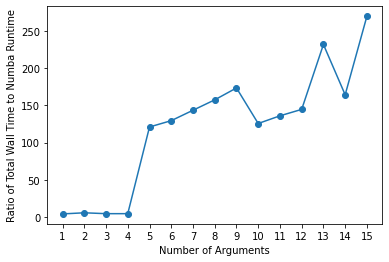

In [8]:
fig, ax = plt.subplots()
xvec = range(len(ratio))
ax.plot(xvec, ratio.values(), '-o')
ax.set_xticks(xvec)
ax.set_xticklabels([x+1 for x in xvec])
ax.set_ylabel('Ratio of Total Wall Time to Numba Runtime')
ax.set_xlabel('Number of Arguments')

# Test impact of argument type

In [9]:
a = np.arange(1000, dtype=np.float64)
b = np.arange(1000, dtype=np.int64)
c = "short string"
# d = b*10 # long string

# Typed dict
d = Dict.empty(
    key_type=types.int64,
    value_type=types.float64[:],
)

d[0] = np.asarray([1, 0.5, 2], dtype='f8')

# Typed list
e = List(list(range(100)))

In [10]:
cpu_times = {}

@jit_timer
def fa(a):
    return a[0]

@jit_timer
def fa(a):
    return a[0]

@jit_timer
def fb(a):
    return a[0]

@jit_timer
def fc(a):
    return a[0]

@jit_timer
def fd(d):
    return d[0]

@jit_timer
def fe(f):
    return f[0]

@jit_timer
def test_argtype(d, e):
    fa(a)
    fb(b)
    fc(c)
    fd(d)
    fe(e)

In [11]:
test_argtype(d, e)
test_argtype(d, e)

In [12]:
clock_times = defaultdict(list)
ntrials = 5

for _ in range(ntrials):
    start = time.time()
    fa(a)
    ta = (time.time()-start)
    clock_times['fa'].append(ta)
    
    start = time.time()
    fb(b)
    tb = (time.time()-start)
    clock_times['fb'].append(tb)
    
    start = time.time()
    fc(c)
    tc = (time.time()-start)
    clock_times['fc'].append(tc)
    
    start = time.time()
    fd(d)
    td = (time.time()-start)
    clock_times['fd'].append(td)
    
    start = time.time()
    fe(e)
    te = (time.time()-start)
    clock_times['fe'].append(te)

In [13]:
np.mean(clock_times['fa'][1:])

5.066394805908203e-06

In [14]:
ratio = dict()
for k,v in clock_times.items():
    # Exclude compilation time
    ratio[k] = np.min(clock_times[k])/np.min(cpu_times[k])

In [15]:
ratio

{'fa': 3.3333333333333335,
 'fb': 4.5,
 'fc': 19.333333333333332,
 'fd': 28.666666666666668,
 'fe': 26.0}

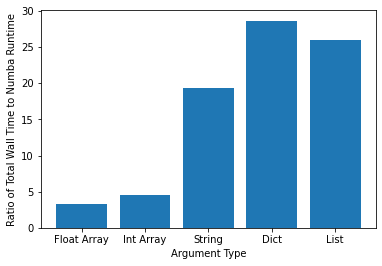

In [16]:
fig, ax = plt.subplots()
xlabels = ['Float Array', 'Int Array', 'String', 'Dict', 'List']
xvec = list(range(len(xlabels)))
ax.bar(xvec, list(ratio.values()))
ax.set_xticks(xvec)
ax.set_xticklabels(xlabels)
ax.set_ylabel('Ratio of Total Wall Time to Numba Runtime')
ax.set_xlabel('Argument Type')
plt.show()